# **Analisis Perbandingan Model Klasifikasi antara Support Vector Machine Classifier (SVM) dan Logistic Regression Pada kasus Data Biner**

## **Imputasi Library dan Modul yang dibutuhkan**

In [82]:
!pip install ucimlrepo

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## **Read Dataset and Exploratory Data Analysis**

In [105]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
tic_tac_toe_endgame = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
X = tic_tac_toe_endgame.data.features 
y = tic_tac_toe_endgame.data.targets 

X

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b
...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x
954,o,x,o,x,x,o,x,o,x
955,o,x,o,x,o,x,x,o,x
956,o,x,o,o,x,x,x,o,x


In [106]:
y

,class
0,positive
1,positive
2,positive
3,positive
4,positive
...,...
953,negative
954,negative
955,negative
956,negative


In [86]:
shape_x = X.shape
shape_y = y.shape

shape_x

(958, 9)

In [87]:
shape_y

(958, 1)

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   top-left-square       958 non-null    object
 1   top-middle-square     958 non-null    object
 2   top-right-square      958 non-null    object
 3   middle-left-square    958 non-null    object
 4   middle-middle-square  958 non-null    object
 5   middle-right-square   958 non-null    object
 6   bottom-left-square    958 non-null    object
 7   bottom-middle-square  958 non-null    object
 8   bottom-right-square   958 non-null    object
dtypes: object(9)
memory usage: 67.5+ KB


In [89]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   958 non-null    object
dtypes: object(1)
memory usage: 7.6+ KB


In [90]:
# Knowing unique value for each feature
for i in X.columns:
    value = X[i].unique()
    print('{} :'.format(i), value)

top-left-square : ['x' 'o' 'b']
top-middle-square : ['x' 'o' 'b']
top-right-square : ['x' 'o' 'b']
middle-left-square : ['x' 'o' 'b']
middle-middle-square : ['o' 'b' 'x']
middle-right-square : ['o' 'b' 'x']
bottom-left-square : ['x' 'o' 'b']
bottom-middle-square : ['o' 'x' 'b']
bottom-right-square : ['o' 'x' 'b']


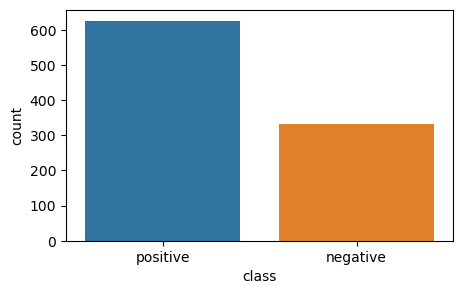

In [107]:
#Chek imbalance Data target/class
plt.figure(figsize=(5,3))
sns.countplot(x = 'class', data=y)
plt.show()

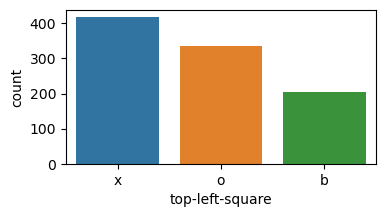

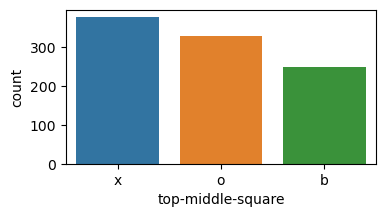

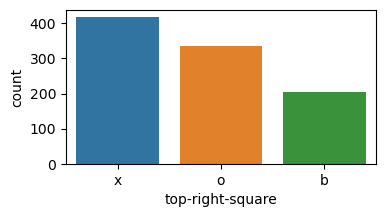

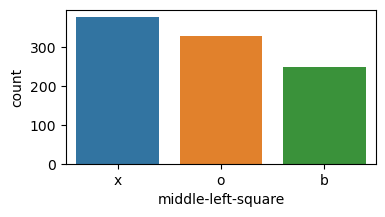

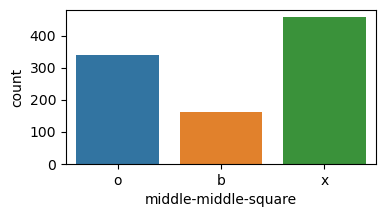

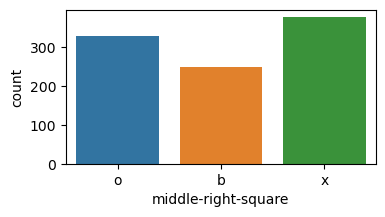

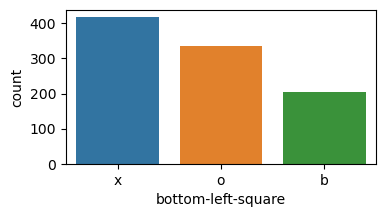

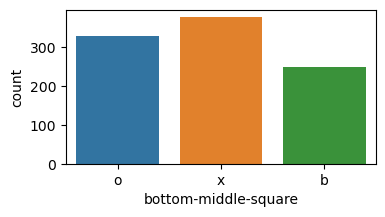

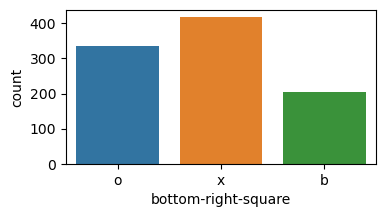

In [92]:
for i in X.columns:
    plt.figure(figsize=(4,2))
    sns.countplot(x = i, data=X)
    plt.show()

In [93]:
#Chek missing value for data feature
X.isnull().sum()

top-left-square         0
top-middle-square       0
top-right-square        0
middle-left-square      0
middle-middle-square    0
middle-right-square     0
bottom-left-square      0
bottom-middle-square    0
bottom-right-square     0
dtype: int64

In [94]:
# Chek missing value for data target/class
y.isnull().sum()

class    0
dtype: int64

## **Data Preprocessing**

### 1. Label Encoding

In [108]:
#Label Encoding for dataset feature
for i in X.columns:
    le = LabelEncoder()
    X[i] = le.fit_transform(X[i])

C:\Users\User\AppData\Local\Temp\ipykernel_22912\845551892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = le.fit_transform(X[i])
C:\Users\User\AppData\Local\Temp\ipykernel_22912\845551892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = le.fit_transform(X[i])
C:\Users\User\AppData\Local\Temp\ipykernel_22912\845551892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   top-left-square       958 non-null    int32
 1   top-middle-square     958 non-null    int32
 2   top-right-square      958 non-null    int32
 3   middle-left-square    958 non-null    int32
 4   middle-middle-square  958 non-null    int32
 5   middle-right-square   958 non-null    int32
 6   bottom-left-square    958 non-null    int32
 7   bottom-middle-square  958 non-null    int32
 8   bottom-right-square   958 non-null    int32
dtypes: int32(9)
memory usage: 33.8 KB


In [110]:
X

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2
954,1,2,1,2,2,1,2,1,2
955,1,2,1,2,1,2,2,1,2
956,1,2,1,1,2,2,2,1,2


In [111]:
# Label Encoding for data target/class
y['class'] = le.fit_transform(y['class'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   958 non-null    int32
dtypes: int32(1)
memory usage: 3.9 KB


C:\Users\User\AppData\Local\Temp\ipykernel_22912\1248588531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = le.fit_transform(y['class'])


In [115]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
953,0
954,0
955,0
956,0


### 3. Train test Split Dataset

In [117]:
df = pd.concat([X, y], axis=1)
df.sample(5)

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
702,2,1,0,0,1,2,2,1,0,0
740,1,2,2,2,2,0,1,1,1,0
395,1,1,2,0,2,2,0,1,2,1
889,0,2,2,0,2,0,1,1,1,0
159,2,1,1,2,1,2,2,0,0,1


In [120]:
X = df.drop(['class'], axis=1, inplace=False)
y = df['class']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Building Model Machine Learning Classification**

### 1. Support Vector Machine Classifier (SVC) Without Improvement

In [132]:
svm = SVC()
model_svc = svm.fit(X_train, y_train)

predictions = model_svc.predict(X_test) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79        67
           1       0.84      1.00      0.92       125

    accuracy                           0.88       192
   macro avg       0.92      0.83      0.85       192
weighted avg       0.90      0.88      0.87       192



### 2. Logistic Regression Without Improvement

In [133]:
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)

predict = model_lr.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.72      0.19      0.31        67
           1       0.69      0.96      0.80       125

    accuracy                           0.69       192
   macro avg       0.71      0.58      0.55       192
weighted avg       0.70      0.69      0.63       192



### 3. Suport Vector Machine Classifier (SVC) With Hyperparameter Tuning Using GridSearch

In [137]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear', 'poly']}  
  
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.656 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.654 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.654 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.654 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.654 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.942 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [140]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [142]:
svm = SVC(C=1000, gamma=0.01, kernel='rbf')
model2_svc = svm.fit(X_train, y_train)

prediction2 = model2_svc.predict(X_test)
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        67
           1       0.95      1.00      0.98       125

    accuracy                           0.97       192
   macro avg       0.98      0.96      0.96       192
weighted avg       0.97      0.97      0.97       192



### 4. Logistic Regression With Hyperparameter Tuning Using GridSearch

In [143]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
[CV 1/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan tota

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=l

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=0.0001, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=l2, solver=sag;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, penalty=l2, solver=sag;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=l2, solver=sag;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, penalty=l2, solver=sag;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.0001, m

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=0.0001, max_iter=1000, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=none, solver=sag;, score=0.734 total time=   0

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.0001, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penal

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0001, max_iter=5000, penalty=l2, solver=sag;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penalty=l2, solver=sag;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, penalty=l2, solver=sag;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5000, penalty=l2, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=5000, penalty=l2, solver=saga;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=l2, solver=saga;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penalty=l2, solver=saga;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, penalty=l2, solver=saga;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5000, penalty=l2, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=e

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.0001, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=5000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.000263665089873035

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solve

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.656 total time=   0.0s
[CV 2/5] 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=saga;, score=0.693 tota

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.654 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solve

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=liblinear;, score=0.344 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=liblinear;, score=0.346 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=liblinear;, score=0.346 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=liblinear;, score=0.346 tot

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=newton-cg;

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=liblinear;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=sag;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=sag;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=sag;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=sag;, score=0.654 total ti

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.004

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=liblinear;, score=0.656 total

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga;, score=0.734 total time=   0.

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=liblinear;, score=0.656 total

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=newton-cg;, score=0

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=sag;, score=0.693 total time= 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=liblinear;, score=0.604 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=liblinear;, score=0.608 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=liblinear;, score=0.588 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=sag;, score=0.693 tot

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=  

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=sag;, score=0.734 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.688 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.686 total time=   0.0s

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear;, score=0.654 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear;, score=0.654 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=0.08858667904100823, max_iter=100, penalty=l1, solver=saga;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=100, penalty=l1, solver=saga;, score=0.660 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs;, score=0.673 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=newton-cg;, score=0.714 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.08858

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0885866790

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 tota

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.233572

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=sag;, score=0.734 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=liblinear;, score=0.708 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=liblinear;, score=0.647 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=liblinear;, score=0.660 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=liblinear;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=liblinear;, score=0.680 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time= 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear;, score=0.708 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.615848

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=sag;, score=0.734 total time=   0.0s

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=1000

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear;, score=0.693 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear;, score=0.693 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time= 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=liblinear;, score=0.660 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=liblinear;, score=0.693 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=liblinear;, score=0.693 total time=   0.0s
[

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=4.2813

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_it

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=liblinear;, score=nan total time= 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=11.28837891684

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=  

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=11.288378

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=liblinear;, score=0.734 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=liblinear;, score=0.660 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=liblinear;, score=0.693 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=liblinear;, score=0.693 total time=   0.0s
[C

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[C

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.734 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.660 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.693 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.693 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.654 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=29.763514

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=78.47599

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear;, score=0.734 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear;, score=0.660 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear;, score=0.693 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear;, score=0.693 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear;, score=0.654 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=78.47599703514607,

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=78.47599703514607

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] EN

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=206.913808111479, max_iter=100, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=1000, pe

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=206.9

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=5000, pen

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[C

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=10

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=545.5594781168514

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=1000, pen

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=2500, 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[C

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=100, pen

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[C

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, 

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 2/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=3792.690190732246, ma

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=10000.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.693 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.654 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=100, penalty=l1, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=100, penalty=l1, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=100, penalty=l1, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=100, penalty=l1, solve

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 3/5] END C=10000.0, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=100, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=100, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=100, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=100, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[C

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=10000.0, max_iter=1000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=none, solver=sag;, score=0.654 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.734 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.660 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.693 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.654 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_ite

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10000.0, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=l2, solver=liblinear;, score=0.734 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=l2, solver=liblinear;, score=0.660 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=l2, solver=liblinear;, score=0.693 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=l2, solver=liblinear;, score=0.693 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=l2, solver=liblinear;, score=0.654 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=l2, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=l2, solver=sag;, score=0.660 total time=   0.0s
[C

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 4/5] END C=10000.0, max_iter=2500, penalty=none, solver=lbfgs;, score=0.693 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=none, solver=lbfgs;, score=0.654 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.734 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.660 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.693 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=none, solver=liblinear;, score=nan tot

D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Temp\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Temp\lib\site-packages\sklea

[CV 5/5] END C=10000.0, max_iter=5000, penalty=none, solver=newton-cg;, score=0.654 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=5000, penalty=none, solver=sag;, score=0.734 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=5000, penalty=none, solver=sag;, score=0.660 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=5000, penalty=none, solver=sag;, score=0.693 total time=   0.0s
[CV 

D:\Temp\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.34595535 ...        nan 0.68662253 0.68662253]
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=3)

In [144]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 4.281332398719396, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
LogisticRegression(C=4.281332398719396, penalty='l1', solver='saga')


In [146]:
lr2 = LogisticRegression(C=4.281332398719396, max_iter=100, penalty='l1', solver='saga')
model2_lr = lr2.fit(X_train, y_train)

predict2 = model2_lr.predict(X_test)
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.72      0.19      0.31        67
           1       0.69      0.96      0.80       125

    accuracy                           0.69       192
   macro avg       0.71      0.58      0.55       192
weighted avg       0.70      0.69      0.63       192

